<a href="https://colab.research.google.com/github/garciamilord/AI-MachineLearning/blob/main/AI7HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install scipy
!pip install joblib
!pip install scikit-learn

# 1) Decision Trees:

In [ ]:
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn import tree
import numpy as np
import scipy
import pandas as pd
import graphviz
from sklearn.neural_network import MLPClassifier

d)

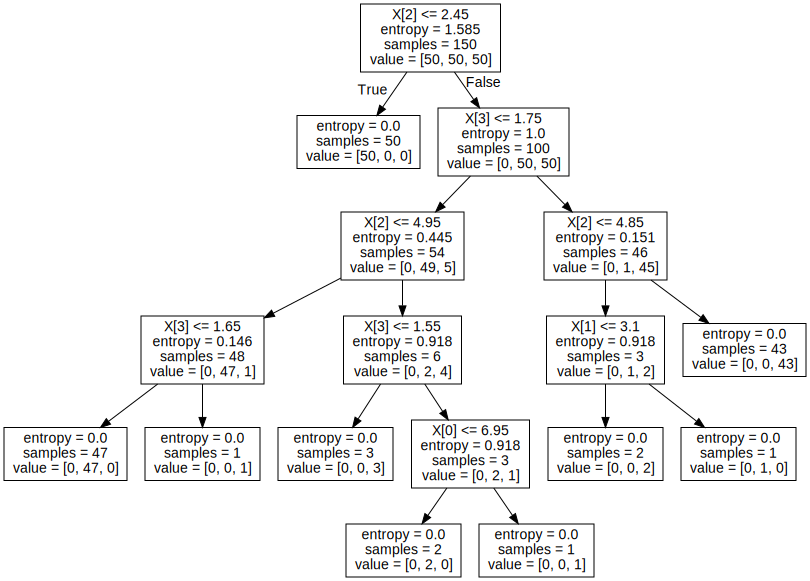

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

e) 

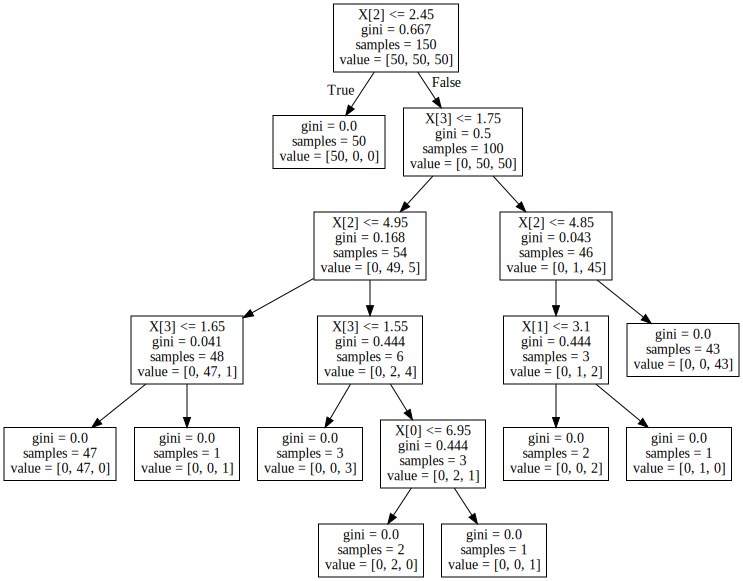

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

f)

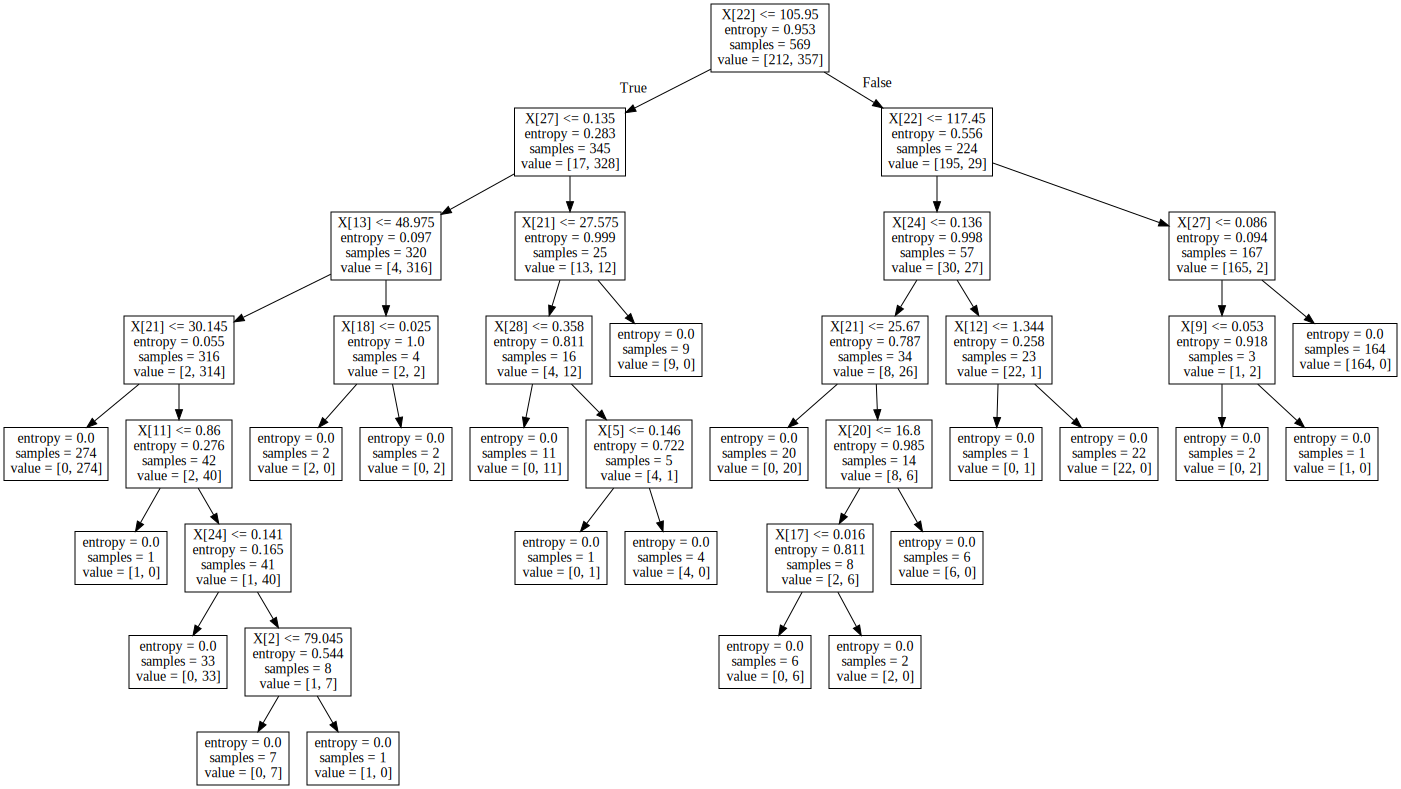

In [ ]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

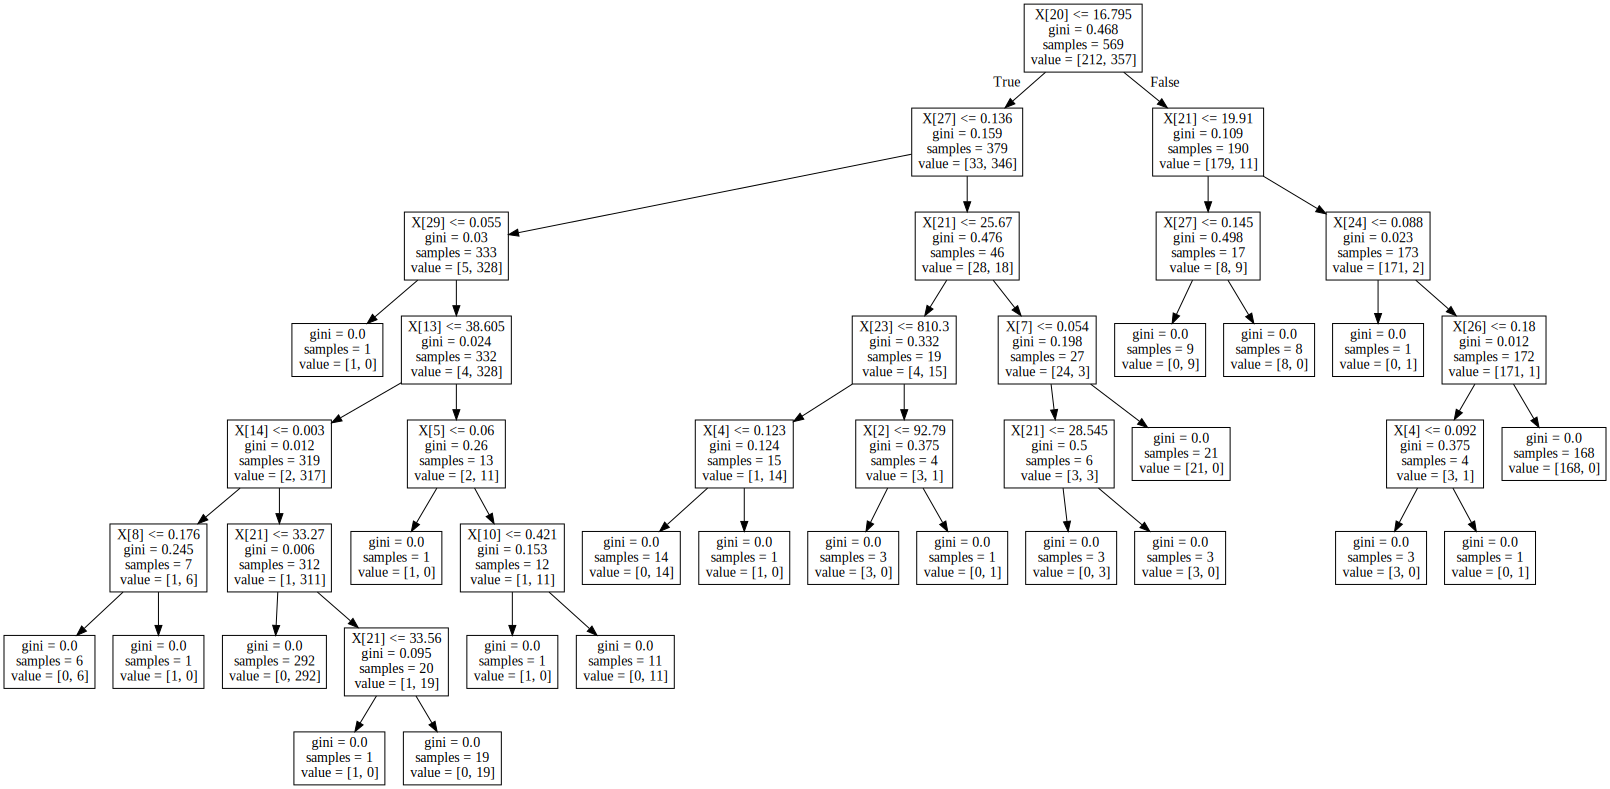

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

# 2) Neural Networks

a)

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha = 1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

b) 

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000


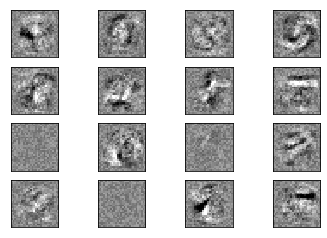

In [ ]:


import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X / 255.0

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()



# 4) 

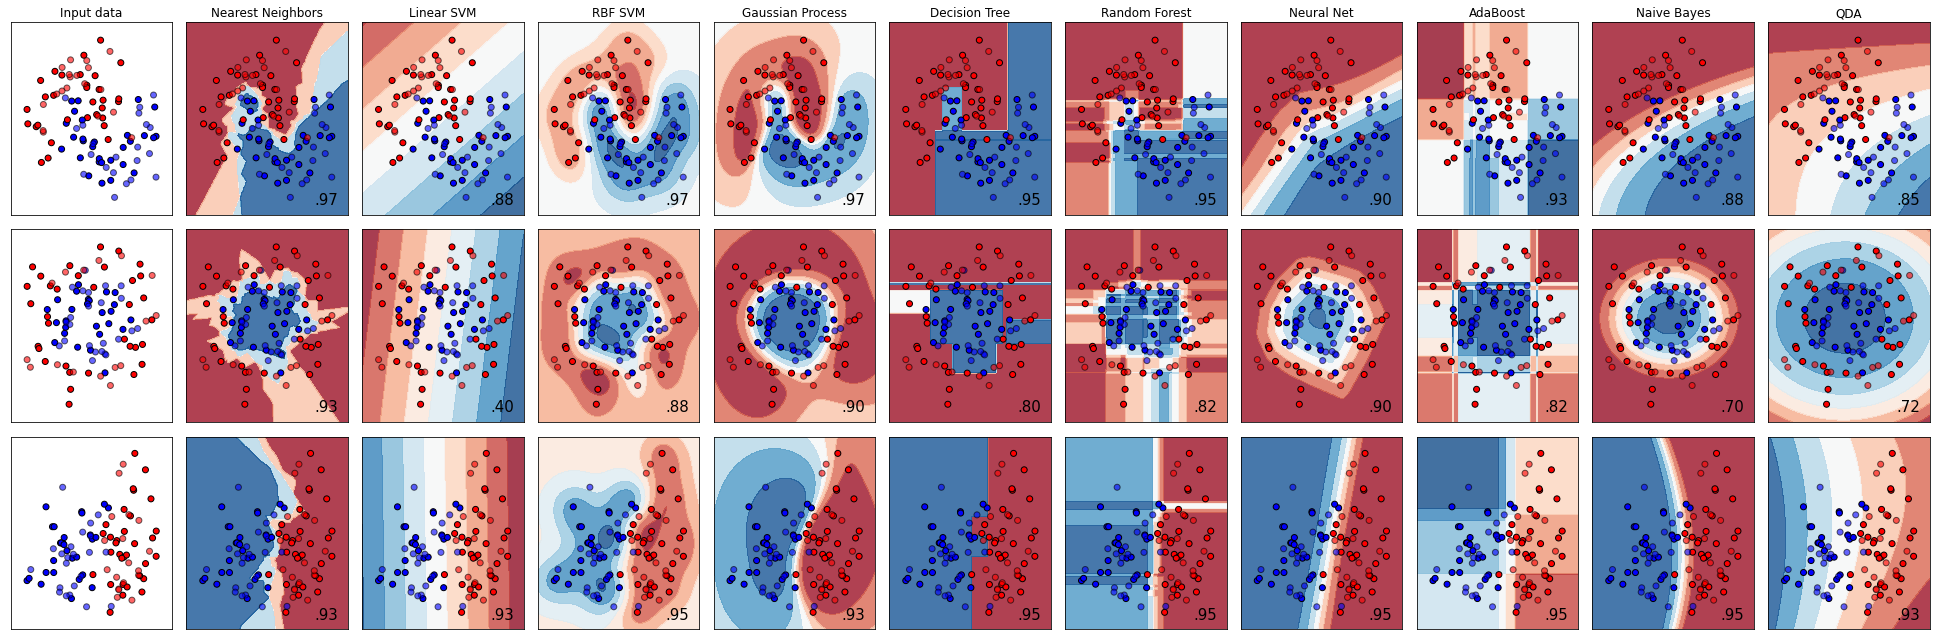

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# 3)

# Naive Bayes Classification using Scikit-learn
Learn how to build and evaluate a Naive Bayes Classifier using Python's Scikit-learn package.
Suppose you are a product manager, you want to classify customer reviews in positive and negative classes. Or As a loan manager, you want to identify which loan applicants are safe or risky? As a healthcare analyst, you want to predict which patients can suffer from diabetes disease. All the examples have the same kind of problem to classify reviews, loan applicants, and patients.

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

In this tutorial, you are going to learn about all of the following:

Classification Workflow

What is Naive Bayes classifier?

How Naive Bayes classifier works?

Classifier building in Scikit-learn

Zero Probability Problem

It's advantages and disadvantages

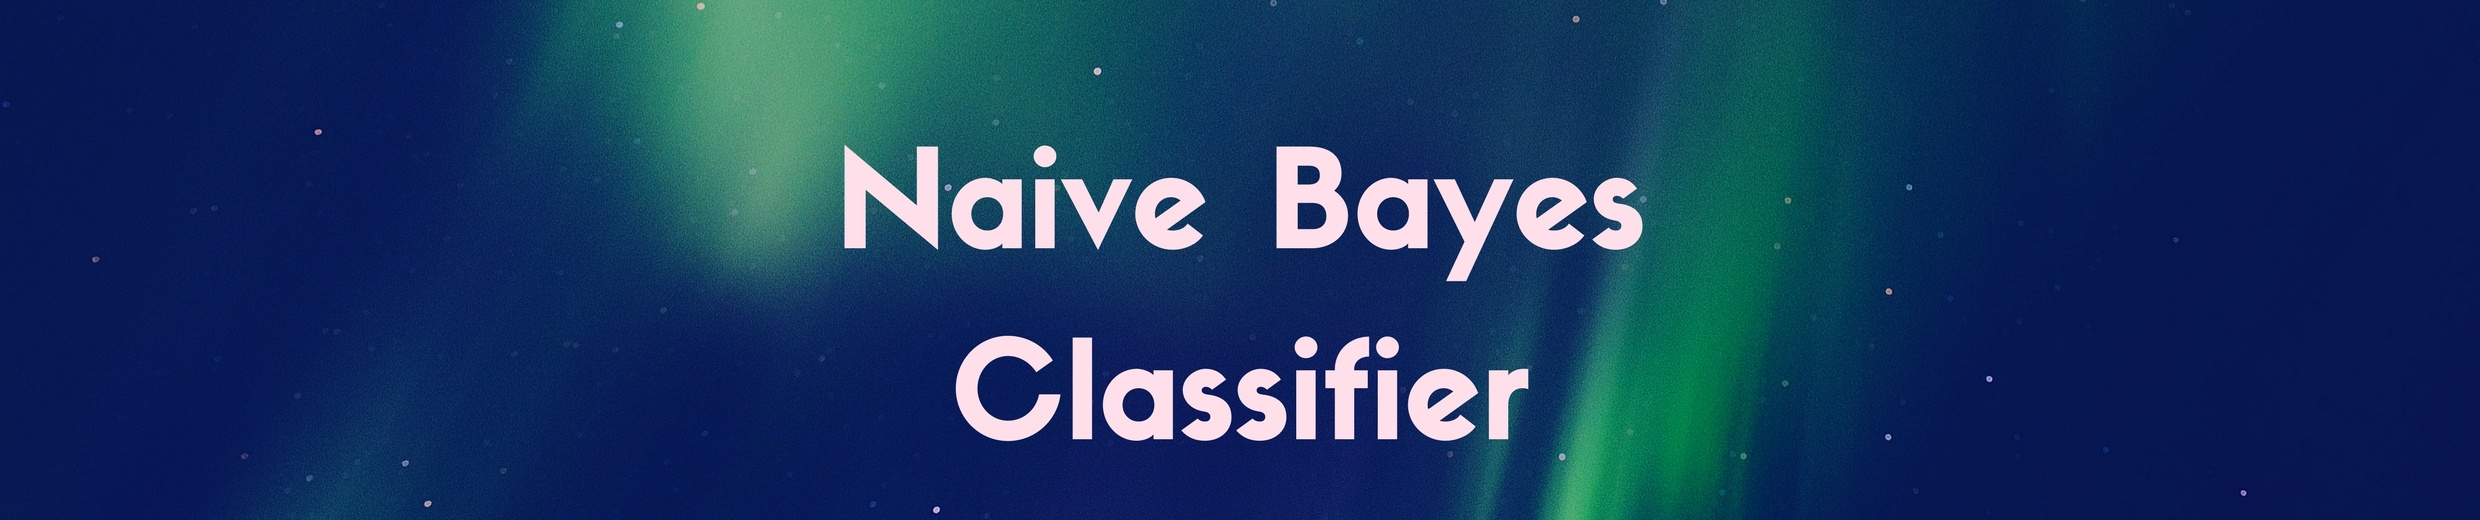

#Classification Workflow
Whenever you perform classification, the first step is to understand the problem and identify potential features and label. Features are those characteristics or attributes which affect the results of the label. For example, in the case of a loan distribution, bank manager's identify customer’s occupation, income, age, location, previous loan history, transaction history, and credit score. These characteristics are known as features which help the model classify customers.

The classification has two phases, a learning phase, and the evaluation phase. In the learning phase, classifier trains its model on a given dataset and in the evaluation phase, it tests the classifier performance. Performance is evaluated on the basis of various parameters such as accuracy, error, precision, and recall.

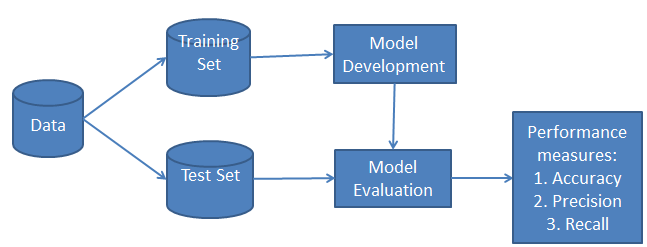

#What is Naive Bayes Classifier?
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.



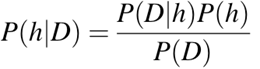

* P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.

* P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.

* P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.

* P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.

#How Naive Bayes classifier works?
Let’s understand the working of Naive Bayes through an example. Given an example of weather conditions and playing sports. You need to calculate the probability of playing sports. Now, you need to classify whether players will play or not, based on the weather condition.

#First Approach (In case of a single feature)
Naive Bayes classifier calculates the probability of an event in the following steps:

* Step 1: Calculate the prior probability for given class labels
* Step 2: Find Likelihood probability with each attribute for each class
* Step 3: Put these value in Bayes Formula and calculate posterior probability.
* Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

For simplifying prior and posterior probability calculation you can use the two tables frequency and likelihood tables. Both of these tables will help you to calculate the prior and posterior probability. The Frequency table contains the occurrence of labels for all features. There are two likelihood tables. Likelihood Table 1 is showing prior probabilities of labels and Likelihood Table 2 is showing the posterior probability.

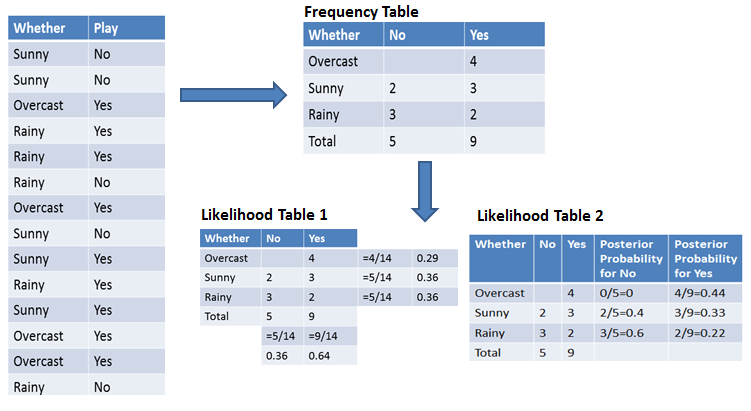

Now suppose you want to calculate the probability of playing when the weather is overcast.

#Probability of playing:

P(Yes | Overcast) = P(Overcast | Yes) P(Yes) / P (Overcast) .....................(1)

1. Calculate Prior Probabilities:

P(Overcast) = 4/14 = 0.29

P(Yes)= 9/14 = 0.64

1. Calculate Posterior Probabilities:

P(Overcast |Yes) = 4/9 = 0.44

1. Put Prior and Posterior probabilities in equation (1)

P (Yes | Overcast) = 0.44 * 0.64 / 0.29 = 0.98(Higher)

Similarly, you can calculate the probability of not playing:

#Probability of not playing:

P(No | Overcast) = P(Overcast | No) P(No) / P (Overcast) .....................(2)

1. Calculate Prior Probabilities:

P(Overcast) = 4/14 = 0.29

P(No)= 5/14 = 0.36

1. Calculate Posterior Probabilities:

P(Overcast |No) = 0/9 = 0

1. Put Prior and Posterior probabilities in equation (2)

P (No | Overcast) = 0 * 0.36 / 0.29 = 0

The probability of a 'Yes' class is higher. So you can determine here if the weather is overcast than players will play the sport.

#Second Approach (In case of multiple features)

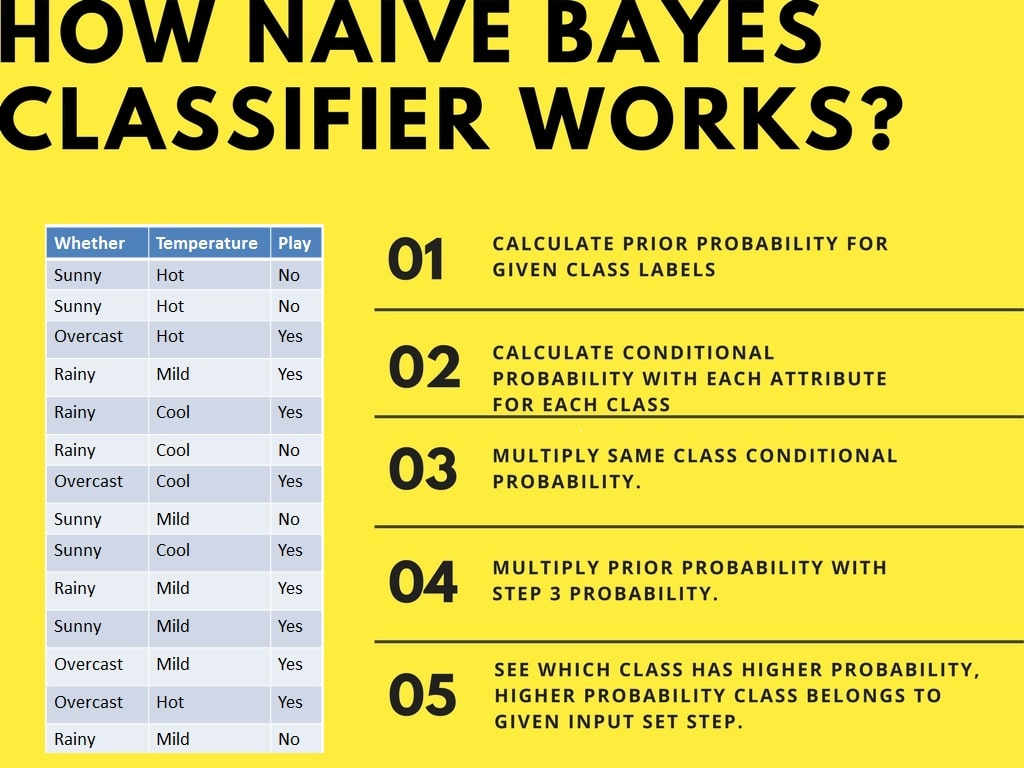

Now suppose you want to calculate the probability of playing when the weather is overcast, and the temperature is mild.

#Probability of playing:

P(Play= Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play= Yes)P(Play=Yes) ..........(1)

P(Weather=Overcast, Temp=Mild | Play= Yes)= P(Overcast |Yes) P(Mild |Yes) ………..(2)

1. Calculate Prior Probabilities: P(Yes)= 9/14 = 0.64

2. Calculate Posterior Probabilities: P(Overcast |Yes) = 4/9 = 0.44 P(Mild |Yes) = 4/9 = 0.44

3. Put Posterior probabilities in equation (2) P(Weather=Overcast, Temp=Mild | Play= Yes) = 0.44 * 0.44 = 0.1936(Higher)

4. Put Prior and Posterior probabilities in equation (1) P(Play= Yes | Weather=Overcast, Temp=Mild) = 0.1936*0.64 = 0.124

Similarly, you can calculate the probability of not playing:

#Probability of not playing:

P(Play= No | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play= No)P(Play=No) ..........(3)

P(Weather=Overcast, Temp=Mild | Play= No)= P(Weather=Overcast |Play=No) P(Temp=Mild | Play=No) ………..(4)

1. Calculate Prior Probabilities: P(No)= 5/14 = 0.36

2. Calculate Posterior Probabilities: P(Weather=Overcast |Play=No) = 0/9 = 0 P(Temp=Mild | Play=No)=2/5=0.4

3. Put posterior probabilities in equation (4) P(Weather=Overcast, Temp=Mild | Play= No) = 0 * 0.4= 0

4. Put prior and posterior probabilities in equation (3) P(Play= No | Weather=Overcast, Temp=Mild) = 0*0.36=0

The probability of a 'Yes' class is higher. So you can say here that if the weather is overcast than players will play the sport.

#Classifier Building in Scikit-learn
##Naive Bayes Classifier
###Defining Dataset
In this example, you can use the dummy dataset with three columns: weather, temperature, and play. The first two are features(weather, temperature) and the other is the label.

In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

#Encoding Features

First, you need to convert these string labels into numbers. for example: 'Overcast', 'Rainy', 'Sunny' as 0, 1, 2. This is known as label encoding. Scikit-learn provides LabelEncoder library for encoding labels with a value between 0 and one less than the number of discrete classes.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

Similarly, you can also encode temp and play columns.



In [ ]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Now combine both the features (weather and temp) in a single variable (list of tuples).



In [ ]:
#Combinig weather and temp into single listof tuples
features=zip(weather_encoded,temp_encoded)
features=list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


#Generating Model
Generate a model using naive bayes classifier in the following steps:

* Create naive bayes classifier
* Fit the dataset on classifier
* Perform prediction

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


Here, 1 indicates that players can 'play'.

#Naive Bayes with Multiple Labels
Till now you have learned Naive Bayes classification with binary labels. Now you will learn about multiple class classification in Naive Bayes. Which is known as multinomial Naive Bayes classification. For example, if you want to classify a news article about technology, entertainment, politics, or sports.

In model building part, you can use wine dataset which is a very famous multi-class classification problem. "This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars." (UC Irvine)

Dataset comprises of 13 features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three type of wine Class_0, Class_1, and Class_3. Here you can build a model to classify the type of wine.

The dataset is available in the scikit-learn library.

#Loading Data
Let's first load the required wine dataset from scikit-learn datasets.

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#Exploring Data
You can print the target and feature names, to make sure you have the right dataset, as such:

In [ ]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [ ]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [ ]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [ ]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#Splitting Data
First, you separate the columns into dependent and independent variables(or features and label). Then you split those variables into train and test set.

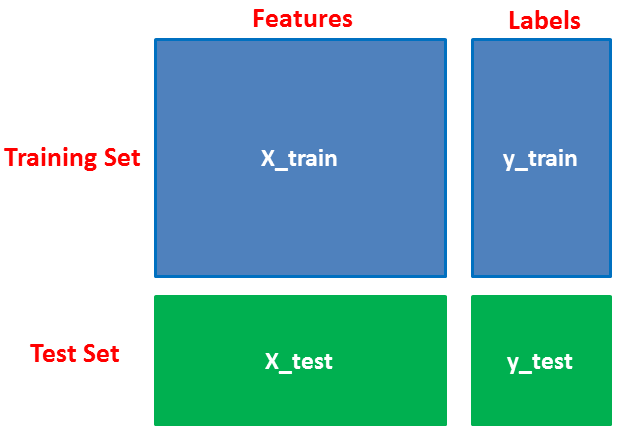

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

#Model Generation
After splitting, you will generate a random forest model on the training set and perform prediction on test set features.

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


#Zero Probability Problem
Suppose there is no tuple for a risky loan in the dataset, in this scenario, the posterior probability will be zero, and the model is unable to make a prediction. This problem is known as Zero Probability because the occurrence of the particular class is zero.

The solution for such an issue is the Laplacian correction or Laplace Transformation. Laplacian correction is one of the smoothing techniques. Here, you can assume that the dataset is large enough that adding one row of each class will not make a difference in the estimated probability. This will overcome the issue of probability values to zero.

For Example: Suppose that for the class loan risky, there are 1000 training tuples in the database. In this database, income column has 0 tuples for low income, 990 tuples for medium income, and 10 tuples for high income. The probabilities of these events, without the Laplacian correction, are 0, 0.990 (from 990/1000), and 0.010 (from 10/1000)

Now, apply Laplacian correction on the given dataset. Let's add 1 more tuple for each income-value pair. The probabilities of these events:

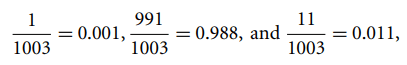

#Advantages
* It is not only a simple approach but also a fast and accurate method for prediction.

* Naive Bayes has very low computation cost.

* It can efficiently work on a large dataset.

* It performs well in case of discrete response variable compared to the continuous variable.

* It can be used with multiple class prediction problems.

* It also performs well in the case of text analytics problems.

* When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.

#Disadvantages
* The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.

* If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.

#Conclusion
Congratulations, you have made it to the end of this tutorial!

In this tutorial, you learned about Naïve Bayes algorithm, it's working, Naive Bayes assumption, issues, implementation, advantages, and disadvantages. Along the road, you have also learned model building and evaluation in scikit-learn for binary and multinomial classes.

Naive Bayes is the most straightforward and most potent algorithm. In spite of the significant advances of Machine Learning in the last couple of years, it has proved its worth. It has been successfully deployed in many applications from text analytics to recommendation engines.

I look forward to hearing any feedback or questions. You can ask your questions by leaving a comment, and I will try my best to answer it.

If you would like to learn more about scikit-learn in Python, take DataCamp's Supervised Learning with scikit-learn course.

Cited source https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn